In [1]:
%pip install pandas numpy matplotlib seaborn
%pip install "pandas[plot, output-formatting]"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## READ IN THE CSV FILE AND REMOVE DUPLICATES

In [2]:
# Find a set of all available encodings
alias_values = set(aliases.values())

for encoding in alias_values:
    try:
        df = pd.read_csv('crime.csv', nrows=10, encoding=encoding) # read only first 10 rows
        print('successful', encoding)
    except:
        pass

successful cp1256
successful cp1251
successful cp437
successful mac_greek
successful mac_latin2
successful iso8859_15
successful cp860
successful koi8_r
successful cp862
successful cp864
successful iso8859_13
successful gbk
successful kz1048
successful iso8859_3
successful cp1250
successful cp500
successful utf_16_be
successful cp1140
successful big5hkscs
successful mac_turkish
successful cp932
successful cp273
successful cp1254
successful iso8859_4
successful iso8859_5
successful iso8859_2
successful cp037
successful cp863
successful cp866
successful iso8859_9
successful mac_cyrillic
successful cp1255
successful cp858
successful hp_roman8
successful iso8859_11
successful cp1257
successful cp1026
successful cp869
successful cp861
successful iso8859_6
successful ptcp154
successful iso8859_14
successful cp1253
successful cp775
successful cp1125
successful utf_16_le
successful gb18030
successful cp1252
successful iso8859_16
successful cp1258
successful iso8859_10
successful cp850
successf

In [3]:
# Read in the crime.csv file and use the timestamp as a datetime index
crime = pd.read_csv('crime.csv', encoding='ISO-8859-11')

In [4]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [5]:
crime.shape

(319073, 17)

In [6]:
crime.duplicated().sum()

23

In [7]:
crime.drop_duplicates(inplace=True)

In [8]:
pd.options.display.max_rows = 10

## DATA ANALIZATION

In [9]:

crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [10]:
# Convert object type to daytime
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [11]:
crime.OCCURRED_ON_DATE.dt.month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [12]:
# Summary information on numeric columns
crime.describe()

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [13]:
# Summary information on non-numeric columns
crime.describe(include=object)

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [14]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [15]:
# Checking for columns with missing values
crime.columns[crime.isnull().sum() != 0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [16]:
# Checking for columns with no missing values
crime.columns[crime.isnull().sum() == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [17]:
# Checking for the number of unique values in each column
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(f'{col} has {unique_count} unique values')

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


## DATA EXPLORATION

In [18]:
# 1a. What are the most common crimes in terms of offense group?
crime.OFFENSE_CODE_GROUP.value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

Text(0.5, 1.0, 'Top 10 Offense Groups (as % of all crimes)')

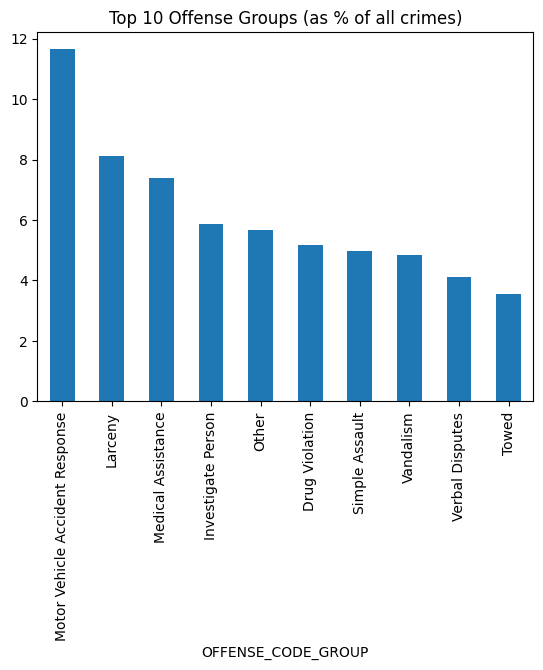

In [19]:
most_offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts()[:10]
display(most_offense_group_vals/crime.shape[0])

# Creating a bar chart of the Top 10 offense groups
(most_offense_group_vals/crime.shape[0]*100).plot(kind='bar')
plt.title('Top 10 Offense Groups (as % of all crimes)')

OFFENSE_CODE_GROUP
Burglary - No Property Taken                 0.000627
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE    0.000627
Biological Threat                            0.000627
INVESTIGATE PERSON                           0.001254
HUMAN TRAFFICKING                            0.002194
Gambling                                     0.002507
Manslaughter                                 0.002507
Explosives                                   0.008463
Phone Call Complaints                        0.009716
Aircraft                                     0.011283
Name: count, dtype: float64

Text(0.5, 1.0, 'Least 10 offense group (as % of all crimes)')

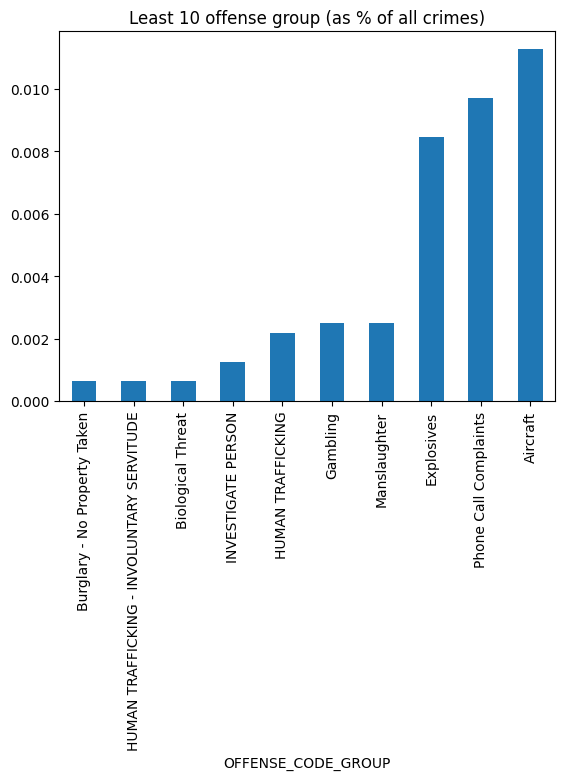

In [20]:
# 1b. What are the least common offense groups?
least_offense_group_vals = crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]
display(least_offense_group_vals/crime.shape[0]*100)

(least_offense_group_vals/crime.shape[0]*100).plot(kind='bar')
plt.title('Least 10 offense group (as % of all crimes)')

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            5.887165
INVESTIGATE PERSON                       5.877762
M/V - LEAVING SCENE - PROPERTY DAMAGE    5.116126
VANDALISM                                4.749412
ASSAULT SIMPLE - BATTERY                 4.635950
VERBAL DISPUTE                           4.105626
TOWED MOTOR VEHICLE                      3.537690
INVESTIGATE PROPERTY                     3.486601
LARCENY THEFT FROM BUILDING              2.842501
THREATS TO DO BODILY HARM                2.834039
Name: count, dtype: float64

Text(0.5, 1.0, 'Most offense description (as % of total crimes)')

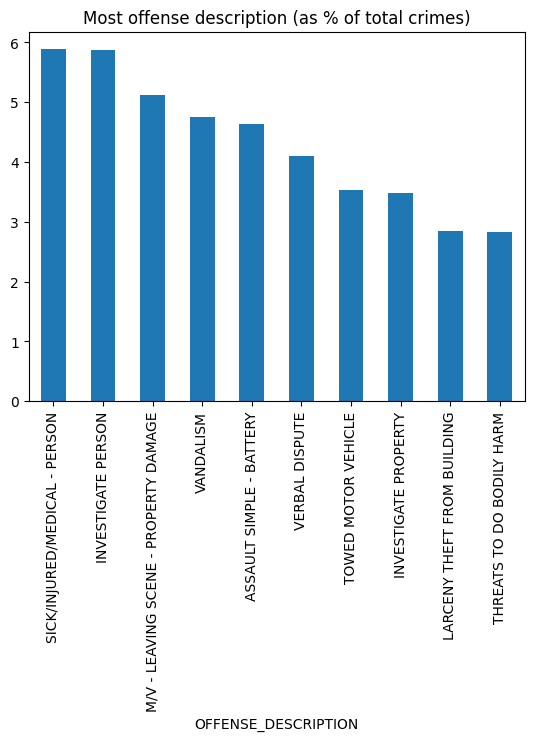

In [21]:
# 2. What are the most common offense description?
most_offense_description = crime.OFFENSE_DESCRIPTION.value_counts()[:10]
display(most_offense_description/crime.shape[0]*100)
(most_offense_description/crime.shape[0]*100).plot(kind='bar')
plt.title('Most offense description (as % of total crimes)')

Text(0.5, 1.0, 'Number of crimes over the year')

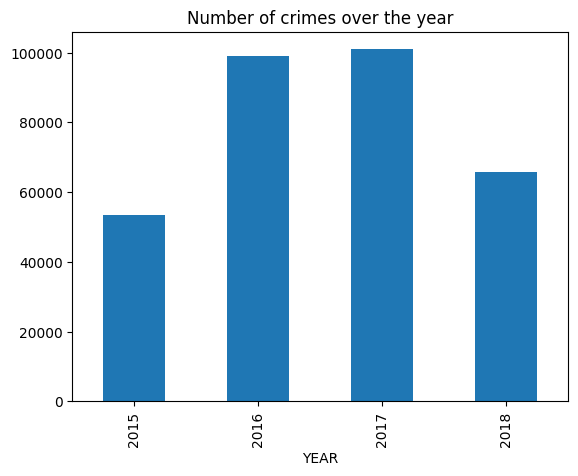

In [22]:
# 3a. In which year were the most crimes committed?
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar')
plt.title('Number of crimes over the year')

Text(0.5, 1.0, 'Number of crimes on day of the week')

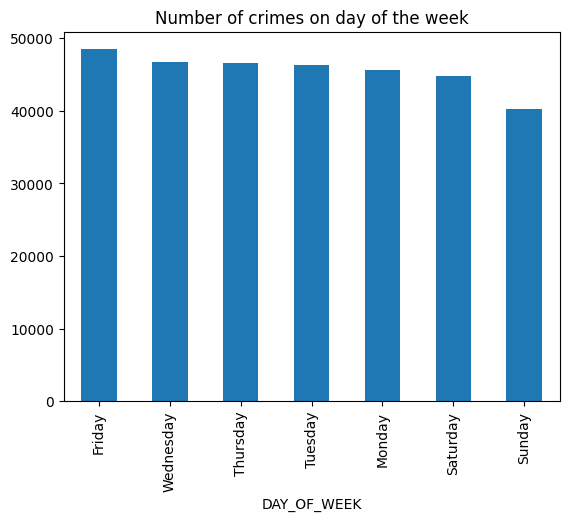

In [23]:
# 3b. Are there more crimes commited on specific days?
crime_everyday = (crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].sort_values(ascending=False))
crime_everyday.plot(kind='bar')
plt.title('Number of crimes on day of the week') 

Text(0.5, 1.0, 'Number of crimes by the hour')

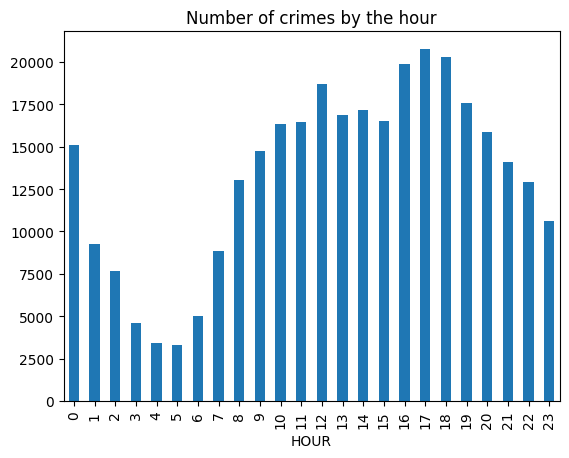

In [24]:
# 3c. Are there more crimes during specific hours?
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar')
plt.title('Number of crimes by the hour')

In [25]:
# 4. On what days and during which hours are the most crimes committed?
week_and_hour = crime.groupby(['HOUR', 'DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
week_and_hour

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
...,...,...,...,...,...,...,...
19,2564,2606,2301,2114,2510,2768,2724
20,2307,2319,2131,2109,2349,2369,2265
21,2089,2003,2077,1902,2070,1925,2043


In [26]:
# Rearrange columns method 1
week_and_hour = week_and_hour[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
week_and_hour

DAY_OF_WEEK,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HOUR,,,,,,,
0,2000,1897,1997,2039,2161,2612,2400
1,1058,1017,942,1077,1275,1855,2043
2,846,641,798,774,952,1827,1855
3,583,460,412,526,532,957,1119
4,386,399,370,436,441,672,704
...,...,...,...,...,...,...,...
19,2606,2768,2724,2510,2564,2301,2114
20,2319,2369,2265,2349,2307,2131,2109
21,2003,1925,2043,2070,2089,2077,1902


In [27]:

# Rearrange columns method 2
week_and_hour = week_and_hour.loc[:,['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
week_and_hour

DAY_OF_WEEK,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HOUR,,,,,,,
0,2000,1897,1997,2039,2161,2612,2400
1,1058,1017,942,1077,1275,1855,2043
2,846,641,798,774,952,1827,1855
3,583,460,412,526,532,957,1119
4,386,399,370,436,441,672,704
...,...,...,...,...,...,...,...
19,2606,2768,2724,2510,2564,2301,2114
20,2319,2369,2265,2349,2307,2131,2109
21,2003,1925,2043,2070,2089,2077,1902


<Axes: xlabel='DAY_OF_WEEK', ylabel='HOUR'>

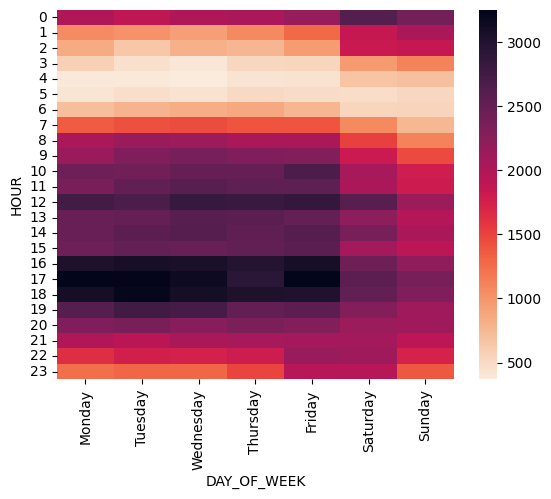

In [28]:
sns.heatmap(week_and_hour, cmap=sns.color_palette('rocket_r',as_cmap=True))

<Axes: xlabel='DAY_OF_WEEK', ylabel='HOUR'>

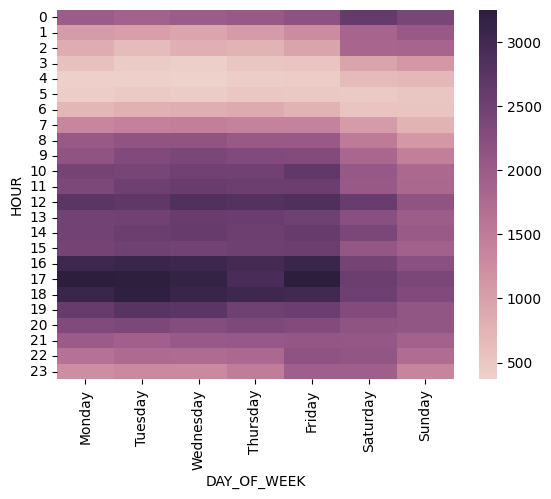

In [29]:
sns.heatmap(week_and_hour, cmap=sns.cubehelix_palette(as_cmap=True))

In [30]:
# 5a. In which months were the number of crimes below average?
year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()
crime_average = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print(f'Average monthly crime rate is {crime_average}')
# def highlight_below_average(val):
#     color = 'red' if val < crime_average else None
#     return f'color:{color}'

# def highlight_max(s):
#     is_max = s == s.max()
#     return ['background-color: yellow' if v else '' for v in is_max]

# year_and_month.style.apply(lambda x: x.map(highlight_below_average), axis=None)

year_and_month.style.highlight_between(left=0, right=crime_average, color='yellow').highlight_max(color='red')


Average monthly crime rate is 7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


In [31]:
# 5b. In which months on average did the most crimes occur?
year_and_month.style.highlight_max(color='red').highlight_min(color='green')


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


<Axes: xlabel='YEAR', ylabel='DISTRICT'>

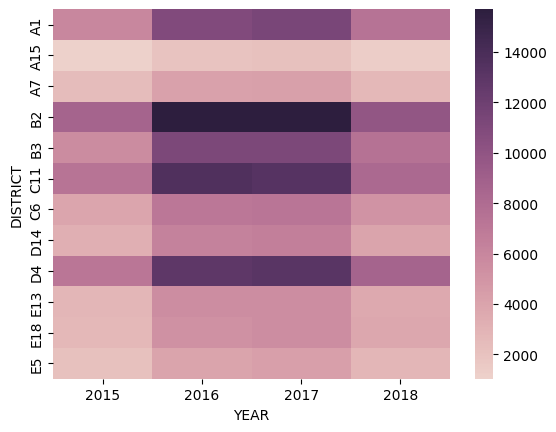

In [32]:
# 6. In which districts were the most crimes committed on yearly basis?
district_yearly = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()
sns.heatmap(district_yearly, cmap=sns.cubehelix_palette(as_cmap=True))

In [33]:
#7. If the value is less than the average crime per district per year, highlight the value in blue
average_district_crime = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].mean()
print(f'The average crime per district per year is {average_district_crime}')
district_yearly.style.highlight_between(left=0, right=average_district_crime, color='blue')

The average crime per district per year is 6610.104166666667


YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601


In [34]:
#8. Highlight the maximum value in each colummn with darkgreen
district_yearly.style.highlight_between(left=0, right=average_district_crime, color='blue').highlight_max(color='darkgreen')



YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
B2,8682,15706,15680,9872
B3,5616,11145,11195,7485
C11,7363,13602,13281,8282
C6,3939,7072,7247,5199
D14,3280,6279,6509,4059
D4,7203,12953,13157,8601
